In [1]:
import numpy as np
import pandas as pd
from LUAD import LUADDataViewer

In [2]:
dataViewer = LUADDataViewer('/Users/yuangao/julianne_geneexpression/data/LUAD_fpkm.csv')

/var/folders/37/7npjhdfd5pq94qljl5f8q9740000gn/T/ipykernel_13680/2331450591.py:1: DtypeWarning: Columns (0,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252

In [3]:
X = dataViewer.getData()
y = dataViewer.getLabels()

In [4]:
dataViewer.idnames()

Index(['ENSG00000242268.2', 'ENSG00000270112.3', 'ENSG00000167578.15',
       'ENSG00000273842.1', 'ENSG00000078237.5', 'ENSG00000146083.10',
       'ENSG00000225275.4', 'ENSG00000158486.12', 'ENSG00000198242.12',
       'ENSG00000259883.1',
       ...
       'ENSG00000238244.3', 'ENSG00000186115.11', 'ENSG00000216352.1',
       'ENSG00000267117.1', 'ENSG00000273233.1', 'ENSG00000105063.17',
       'ENSG00000231119.2', 'ENSG00000280861.1', 'ENSG00000123685.7',
       'ENSG00000181518.3'],
      dtype='object', name='Unnamed: 1', length=60483)

In [5]:
print(X.shape, y.shape)

(594, 60483) (594,)


# random forest

In [6]:
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score

In [7]:
X_train, X_test, y_train, y_test =train_test_split(X, y,train_size=0.8,random_state=1)

In [8]:
clf=XGBClassifier(n_estimators=200, eval_metric='error',use_label_encoder=False, n_jobs=-1,)
clf.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eval_metric='error', gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=200, n_jobs=-1,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)

In [9]:
clf.score(X_test,y_test)

0.7226890756302521

In [10]:
roc_auc_score(y_test,clf.predict_proba(X_test)[:,1])

0.6413461538461538

# shapey values

In [11]:
import shap

In [12]:
explainer = shap.TreeExplainer(clf)
shap_values = explainer.shap_values(X_test)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


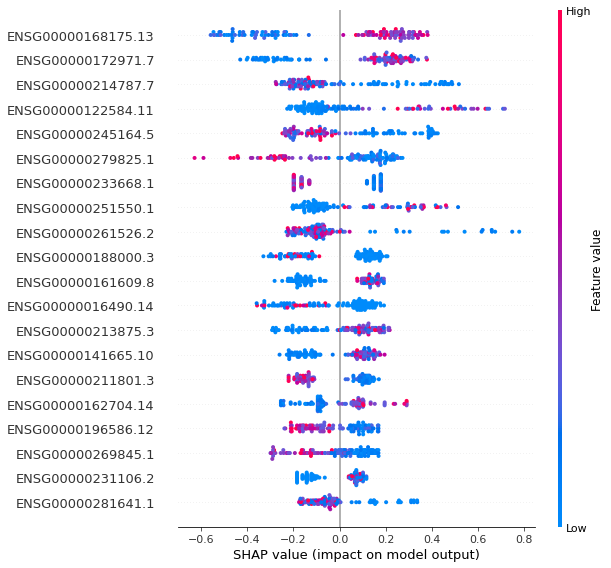

In [13]:
shap.summary_plot(shap_values,X_test,feature_names=dataViewer.idnames(),show=False)